In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('d:/jupyter/datasets/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [19]:
dataset_train[:5]

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
type(dataset_train)

pandas.core.frame.DataFrame

In [4]:
type(training_set)

numpy.ndarray

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [7]:
type(X_train)

numpy.ndarray

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train.shape

(1198, 60, 1)

# building RNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential([

    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),   # return sequence: if you want to add another lstm layer
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),
    Dropout(0.2),                               # 20% of the neurons will be ignored

    LSTM(units=50),
    Dropout(0.2),

    Dense(units=1)

])


In [12]:
regressor.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics= ['accuracy']
)

In [13]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
38/38 - 15s - loss: 0.0424 - accuracy: 0.0017 - 15s/epoch - 385ms/step
Epoch 2/100
38/38 - 1s - loss: 0.0079 - accuracy: 0.0017 - 750ms/epoch - 20ms/step
Epoch 3/100
38/38 - 1s - loss: 0.0053 - accuracy: 0.0017 - 736ms/epoch - 19ms/step
Epoch 4/100
38/38 - 1s - loss: 0.0054 - accuracy: 0.0017 - 732ms/epoch - 19ms/step
Epoch 5/100
38/38 - 1s - loss: 0.0046 - accuracy: 0.0017 - 729ms/epoch - 19ms/step
Epoch 6/100
38/38 - 1s - loss: 0.0048 - accuracy: 0.0017 - 728ms/epoch - 19ms/step
Epoch 7/100
38/38 - 1s - loss: 0.0054 - accuracy: 0.0017 - 739ms/epoch - 19ms/step
Epoch 8/100
38/38 - 1s - loss: 0.0042 - accuracy: 0.0017 - 760ms/epoch - 20ms/step
Epoch 9/100
38/38 - 1s - loss: 0.0046 - accuracy: 0.0017 - 774ms/epoch - 20ms/step
Epoch 10/100
38/38 - 1s - loss: 0.0046 - accuracy: 0.0017 - 760ms/epoch - 20ms/step
Epoch 11/100
38/38 - 1s - loss: 0.0045 - accuracy: 0.0017 - 744ms/epoch - 20ms/step
Epoch 12/100
38/38 - 1s - loss: 0.0044 - accuracy: 0.0017 - 745ms/epoch - 20ms/step
E

In [14]:
dataset_test = pd.read_csv('d:/jupyter/datasets/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):          # 80 is only 20 financial days ---> 60 + 20
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [18]:
predicted_stock_price[:5]


array([[766.8036 ],
       [764.2168 ],
       [763.65576],
       [764.5268 ],
       [767.3115 ]], dtype=float32)

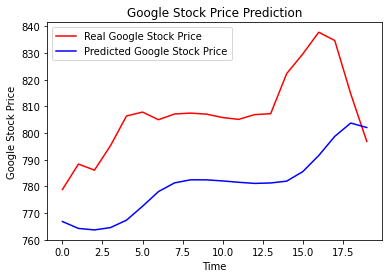

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()